In [7]:
# Running all cells will take about 40 minutes
# Cells with runtime longer than 1 minute have a comment in them with how long it takes

In [8]:
# Exploratory Data Analysis
# Need to visualize the distribution of target variable (Annual Salary)
# Create plots and graphs to visualize data and/or relationships
# Clean up missing values
# Identify potential outliers
# Check for distribution across categories

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Datasets/employee_salary.csv'
df = pd.read_csv(file_path)
# Loads the data and make a dataframe


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df

,YearsExperience,EducationLevel,JobTitle,Department,PerformanceScore,ProjectsCompleted,OvertimeHours,TrainingHours,Certifications,TeamSize,RemoteWork,CompanyTenure,Age,AnnualSalary
0,9.4,High School,Senior,Finance,3.0,10,9.6,104.0,2.0,15,Hybrid,2.2,28,167900
1,6.8,High School,Senior,IT,3.0,10,8.0,27.0,4.0,10,On-site,0.8,24,164700
2,6.5,Bachelor's,Senior,IT,3.0,7,12.8,41.0,2.0,7,NaN,0.2,33,168000
3,6.5,Master's,Senior,IT,3.0,10,13.3,29.0,1.0,15,Hybrid,1.8,29,213600
4,15.2,Master's,Junior,Operations,5.0,9,58.4,NaN,3.0,5,Fully Remote,9.5,39,137100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,5.7,Master's,Junior,HR,3.0,5,15.9,79.0,2.0,5,Hybrid,0.4,28,81100
79996,8.8,Master's,Lead,IT,1.0,5,5.9,55.0,3.0,5,NaN,8.8,34,250000
79997,2.4,High School,Junior,IT,3.0,7,9.3,62.0,3.0,10,NaN,2.4,26,72400
79998,14.9,Bachelor's,Junior,HR,3.0,13,5.1,110.0,4.0,7,Hybrid,9.9,38,108900


In [11]:
df.columns

Index(['YearsExperience', 'EducationLevel', 'JobTitle', 'Department',
       'PerformanceScore', 'ProjectsCompleted', 'OvertimeHours',
       'TrainingHours', 'Certifications', 'TeamSize', 'RemoteWork',
       'CompanyTenure', 'Age', 'AnnualSalary'],
      dtype='object')

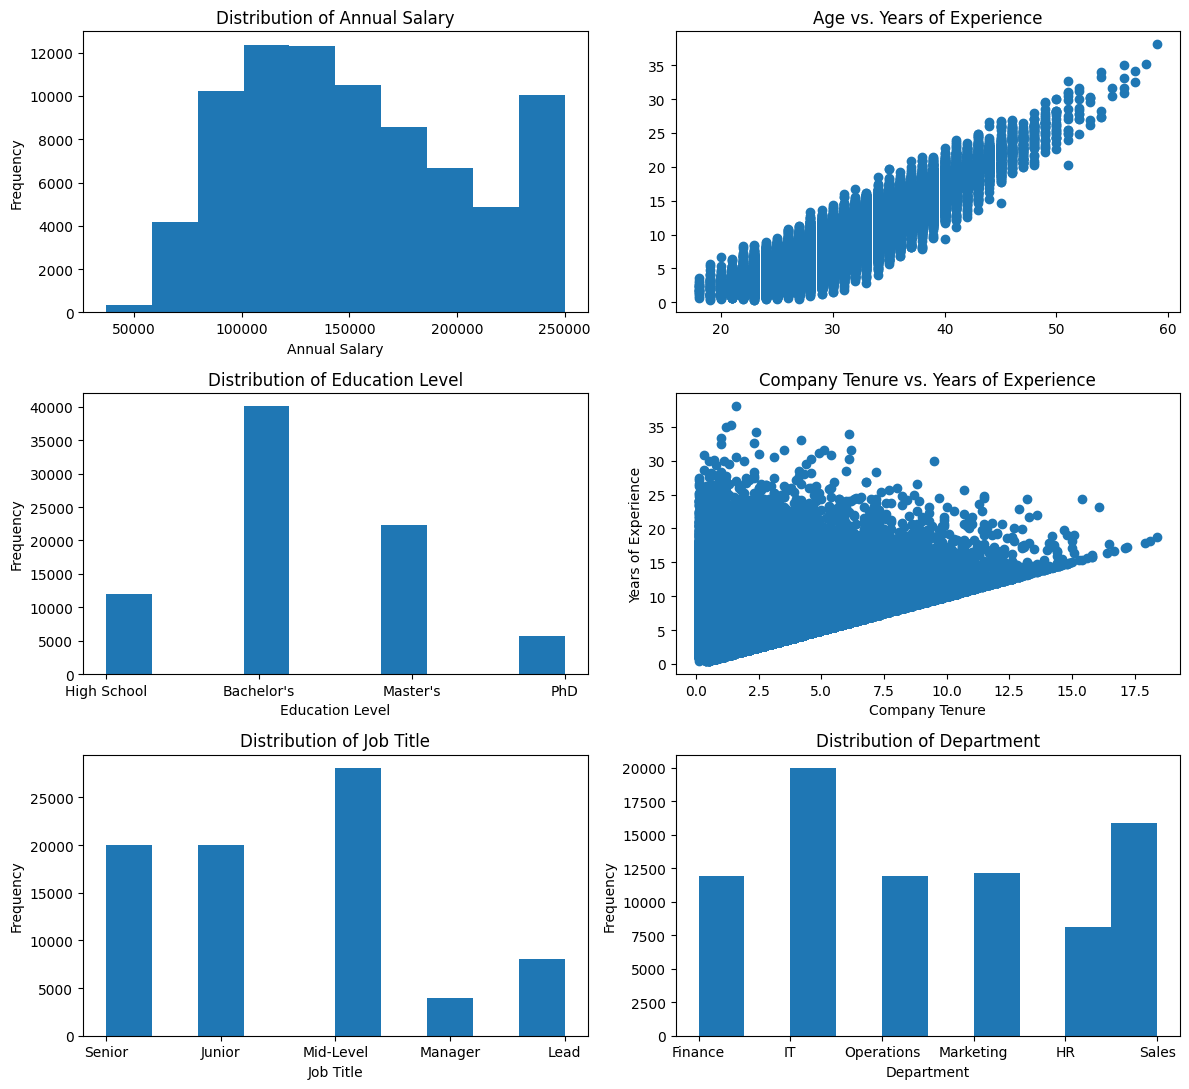

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,11))
axes = axes.flatten()
axes[0].hist(df['AnnualSalary'])
axes[0].set_title("Distribution of Annual Salary")
axes[0].set_xlabel("Annual Salary")
axes[0].set_ylabel("Frequency")
axes[1].scatter(df['Age'], df['YearsExperience'])
axes[1].set_title("Age vs. Years of Experience")
axes[2].hist(df['EducationLevel'])
axes[2].set_title("Distribution of Education Level")
axes[2].set_xlabel("Education Level")
axes[2].set_ylabel("Frequency")
axes[3].scatter(df['CompanyTenure'], df['YearsExperience'])
axes[3].set_title("Company Tenure vs. Years of Experience")
axes[3].set_xlabel("Company Tenure")
axes[3].set_ylabel("Years of Experience")
axes[4].hist(df['JobTitle'])
axes[4].set_title("Distribution of Job Title")
axes[4].set_xlabel("Job Title")
axes[4].set_ylabel("Frequency")
axes[5].hist([df['Department']])
axes[5].set_title("Distribution of Department")
axes[5].set_xlabel("Department")
axes[5].set_ylabel("Frequency")
plt.tight_layout()


AnnualSalary         1.000000
YearsExperience      0.231319
Age                  0.208194
PerformanceScore     0.181854
Certifications       0.152515
CompanyTenure        0.107284
ProjectsCompleted    0.073204
TeamSize             0.041851
OvertimeHours        0.018009
TrainingHours        0.012371
Name: AnnualSalary, dtype: float64


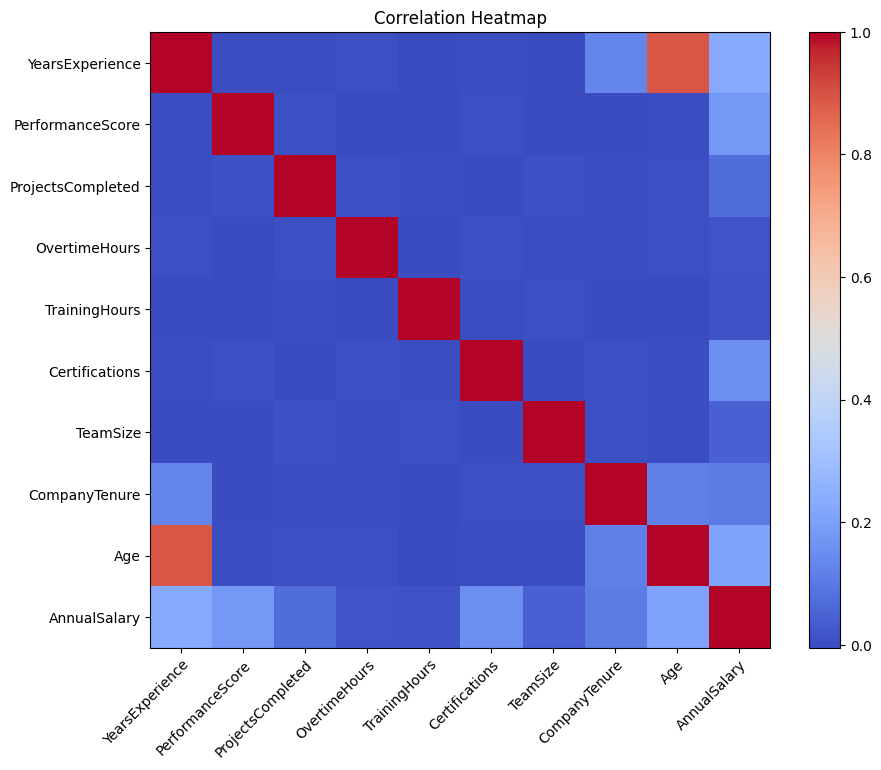

In [13]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix["AnnualSalary"].sort_values(ascending=False))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto')


ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.index)))

ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.colorbar(im)

ax.set_title("Correlation Heatmap")
plt.show()

In [14]:
# Data Preprocessing
# Make the pipelines for dealing with missing values, scaling, and feature engineering
# ColumnTransformer will apply transformations to numeric and categorical features
# Potentially make new features for further info

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

X = df.drop('AnnualSalary', axis=1, inplace=False)
y = df['AnnualSalary']

numeric_features = X.select_dtypes(include=[np.number]).columns # Base them off of X and not the df because X has the correct columns dropped
categorical_features = X.select_dtypes(exclude=[np.number]).columns

numeric_data_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]) # Transforms data into standard deviation values, simple imputer deals with missing values
categorical_data_pipeline = Pipeline([('onehot', OneHotEncoder())])


In [16]:
from sklearn.compose import ColumnTransformer

full_transformer_pipeline = ColumnTransformer([('numeric_stdpreprocessing', numeric_data_pipeline, numeric_features), ('cat_preprocessing', categorical_data_pipeline, categorical_features)])
categorical_features

Index(['EducationLevel', 'JobTitle', 'Department', 'RemoteWork'], dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
df.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_processed = full_transformer_pipeline.fit_transform(X_train)
feature_names = full_transformer_pipeline.get_feature_names_out()

X_train_processed_df = pd.DataFrame(X_train_processed, columns = feature_names, index = X_train.index)
X_test_processed = full_transformer_pipeline.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns = feature_names, index = X_test.index)

In [18]:
# Training Regression Models
# Linear Regression
# Ridge Regression
# Lasso Regression
# Decision Tree Regression
# Support Vector Regression

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
Linear_pipeline = Pipeline([('full_transformer', full_transformer_pipeline),('linear_regression', LinearRegression(n_jobs=-1))])

In [20]:
from sklearn.linear_model import Ridge
Ridge_pipeline = Pipeline([('full_transformer', full_transformer_pipeline), ('ridge_regression', Ridge(alpha = 1.0, solver='auto', random_state=42))])
# alpha effects regularization, higher = reduces overfitting

In [21]:
from sklearn.linear_model import Lasso
Lasso_pipeline = Pipeline([('full_transformer', full_transformer_pipeline), ('lasso_regression', Lasso(alpha =0.4, max_iter=50000, random_state=42))])

In [22]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_pipeline = Pipeline([('full_transformer', full_transformer_pipeline), ('decision_tree', DecisionTreeRegressor(max_depth=20, criterion='absolute_error', min_samples_split=2, min_samples_leaf=1, random_state=42))])
# Want to limit depth to avoid overfitting, splits when atleast 2 samples,

In [23]:
from sklearn.svm import SVR
SVR_pipeline = Pipeline([('full_transformer', full_transformer_pipeline), ('svr', SVR(kernel='linear', C=60, epsilon=0.01, tol=1e-6, gamma='scale'))])
# We want a linear shape for regression, C is for regularization (Higher avoids overfitting), epsilon is vector width sensitivity (Higher means less vectors), tolerance is range within vector before it stops

In [24]:
Linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('full_transformer',
                 ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['YearsExperience', 'PerformanceScore', 'ProjectsCompleted',
       'OvertimeHours', 'TrainingHours', 'Certifications', 'TeamSize',
       'CompanyTenure', 'Age'],
      dtype='object')),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['EducationLevel', 'JobTitle', 'Department', 'RemoteWork'], dtype='object'))])),
                ('linear_regression', LinearRegression(n_jobs=-1))])

In [25]:
Ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('full_transformer',
                 ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['YearsExperience', 'PerformanceScore', 'ProjectsCompleted',
       'OvertimeHours', 'TrainingHours', 'Certifications', 'TeamSize',
       'CompanyTenure', 'Age'],
      dtype='object')),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['EducationLevel', 'JobTitle', 'Department', 'RemoteWork'], dtype='object'))])),
                ('ridge_regression', Ridge(random_state=42))])

In [26]:
Lasso_pipeline.fit(X_train, y_train) # ~1 minute

Pipeline(steps=[('full_transformer',
                 ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['YearsExperience', 'PerformanceScore', 'ProjectsCompleted',
       'OvertimeHours', 'TrainingHours', 'Certifications', 'TeamSize',
       'CompanyTenure', 'Age'],
      dtype='object')),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['EducationLevel', 'JobTitle', 'Department', 'RemoteWork'], dtype='object'))])),
                ('lasso_regression',
                 Lasso(alpha=0.4, max_iter=50000, random_state=42))])

In [27]:
DecisionTree_pipeline.fit(X_train, y_train) # 3 minutes

Pipeline(steps=[('full_transformer',
                 ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['YearsExperience', 'PerformanceScore', 'ProjectsCompleted',
       'OvertimeHours', 'TrainingHours', 'Certifications', 'TeamSize',
       'CompanyTenure', 'Age'],
      dtype='object')),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['EducationLevel', 'JobTitle', 'Department', 'RemoteWork'], dtype='object'))])),
                ('decision_tree',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                                       random_state=42))])

In [28]:
SVR_pipeline.fit(X_train, y_train) # 4 minutes

Pipeline(steps=[('full_transformer',
                 ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['YearsExperience', 'PerformanceScore', 'ProjectsCompleted',
       'OvertimeHours', 'TrainingHours', 'Certifications', 'TeamSize',
       'CompanyTenure', 'Age'],
      dtype='object')),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['EducationLevel', 'JobTitle', 'Department', 'RemoteWork'], dtype='object'))])),
                ('svr', SVR(C=60, epsilon=0.01, kernel='linear', tol=1e-06))])

In [29]:
# Model Evaluation
# Use K-Fold Cross Validation to asses performance
# Use R^2 score, MAE, MSE, RMSE to measure performance
# Compare the models and choose the best one

In [30]:
from sklearn.model_selection import cross_validate
import numpy as np
import math

# Linear Regression
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(Linear_pipeline, X_train, y_train, cv=10, scoring=scoring)
print("Linear Regression Results")
for key,value in scores.items():
    if(key[0] == 't'):
      if(np.mean(value) < 0):
        value *= -1
      if(len(key.split("_")) > 2):
          print(key.split("_")[2],key.split("_")[3],key.split("_")[4],"mean:",np.mean(value))
      else:
          print(key.split("_")[-1],"mean:",np.mean(value))
print("RMSE mean:",math.sqrt((np.mean(scores['test_neg_mean_squared_error']))))

Linear Regression Results
r2 mean: 0.9588200544545742
mean squared error mean: 114896407.8643275
mean absolute error mean: 8129.837829784143
RMSE mean: 10718.97419832362


In [31]:
# Ridge Regression

scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(Ridge_pipeline, X_train, y_train, cv=10, scoring=scoring)
print("Ridge Regression Results")
for key,value in scores.items():
  if(key[0] == 't'):
      if(np.mean(value) < 0):
        value *= -1
      if(len(key.split("_")) > 2):
          print(key.split("_")[2],key.split("_")[3],key.split("_")[4],"mean:",np.mean(value))
      else:
          print(key.split("_")[-1],"mean:",np.mean(value))
print("RMSE mean:",math.sqrt((np.mean(scores['test_neg_mean_squared_error']))))

Ridge Regression Results
r2 mean: 0.9588200453259527
mean squared error mean: 114896412.9671694
mean absolute error mean: 8130.285052346895
RMSE mean: 10718.97443635208


In [32]:
# Lasso Regresion 2 mins

scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(Lasso_pipeline, X_train, y_train, cv=5, scoring=scoring)
print("Lasso Regression Results")
for key,value in scores.items():
  if(key[0] == 't'):
      if(np.mean(value) < 0):
        value *= -1
      if(len(key.split("_")) > 2):
          print(key.split("_")[2],key.split("_")[3],key.split("_")[4],"mean:",np.mean(value))
      else:
          print(key.split("_")[-1],"mean:",np.mean(value))
print("RMSE mean:",math.sqrt((np.mean(scores['test_neg_mean_squared_error']))))

Lasso Regression Results
r2 mean: 0.9588267270624502
mean squared error mean: 114898080.22072971
mean absolute error mean: 8130.391102720214
RMSE mean: 10719.052207202356


In [33]:
# Decision Tree 11 mins kinda sucks compared to other models
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(DecisionTree_pipeline, X_train, y_train, cv=5, scoring=scoring)
print("Decision Tree Regression Results")
for key,value in scores.items():
  if(key[0] == 't'):
      if(np.mean(value) < 0):
        value *= -1
      if(len(key.split("_")) > 2):
          print(key.split("_")[2],key.split("_")[3],key.split("_")[4],"mean:",np.mean(value))
      else:
          print(key.split("_")[-1],"mean:",np.mean(value))
print("RMSE mean:",math.sqrt((np.mean(scores['test_neg_mean_squared_error']))))

Decision Tree Regression Results
r2 mean: 0.9320330326970716
mean squared error mean: 189647988.0859375
mean absolute error mean: 10078.45703125
RMSE mean: 13771.274018257625


In [34]:
# SVR Takes 15 minutes with (kernel='linear', C=60, epsilon=0.01, tol=1e-7, gamma='auto') and 5 folds | RBF takes forever with same other parameters

scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(SVR_pipeline, X_train, y_train, cv=5, scoring=scoring)
print("SVR Results")
for key,value in scores.items():
  if(key[0] == 't'):
      if(np.mean(value) < 0):
        value *= -1
      if(len(key.split("_")) > 2):
          print(key.split("_")[2],key.split("_")[3],key.split("_")[4],"mean:",np.mean(value))
      else:
          print(key.split("_")[-1],"mean:",np.mean(value))
print("RMSE mean:",math.sqrt((np.mean(scores['test_neg_mean_squared_error']))))

SVR Results
r2 mean: 0.957858872759928
mean squared error mean: 117595801.90649529
mean absolute error mean: 8226.893601565886
RMSE mean: 10844.159806388658


In [35]:
# Hyperparameter Tuning
# Use GridSearchCV on highest performing model
# Test different parameters
# Report the best parameters for the model

In [36]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV # 5 minutes to run
params = {'linear_regression__n_jobs':[-1,0,1,2,3,4,5, None], 'linear_regression__fit_intercept':[True,False], 'linear_regression__positive':[True, False]}
grid_search = GridSearchCV(estimator=Linear_pipeline, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(grid_search, X_train, y_train, cv=8, scoring=scoring)
print("Grid Search Results")
for key,value in scores.items():
  if(key[0] == 't'):
      if(np.mean(value) < 0):
        value *= -1
      if(len(key.split("_")) > 2):
          print(key.split("_")[2],key.split("_")[3],key.split("_")[4],"mean:",np.mean(value))
      else:
          print(key.split("_")[-1],"mean:",np.mean(value))
print("RMSE mean:",math.sqrt((np.mean(scores['test_neg_mean_squared_error']))))

{'linear_regression__fit_intercept': False, 'linear_regression__n_jobs': -1, 'linear_regression__positive': False}
Grid Search Results
r2 mean: 0.9588237560918098
mean squared error mean: 114893903.359774
mean absolute error mean: 8129.733648990883
RMSE mean: 10718.857371929807


The model that performed the best was the Linear Regression model. It had an average R2 score of 0.9588200544545742, an average mean squared error of 114896407.8643275, an average mean absolute error of 8129.837829784143, and an average root mean squared error of 10718.97419832362. The mean R2 value for the Linear Regression model and the Ridge Regression model were nearly identical. GridSearch found that the best parameters for the Linear Regression model to use are fit_intercept = False, n_jobs = -1, and positive = False. The fit_intercept parameter tells the model if it needs to adjust for the bias term, when its set to false, the data is already centered at zero. The n_jobs parameter assigns CPU cores used for computing, when it is set to -1 it uses all the available cores. The positive parameter forces the regression coefficients to be positive, when it is false this does not happen. GridSearch improved the average R2 score from 0.9588200544545742 to 0.9588237560918098 which is an increase of .00039%. The average mean squared error score decreased from 114896407.8643275 to 114893903.359774 which is a decrease of 0.00218%. The average mean absolute error decreased from 8129.837829784143 to 8129.733648990883, which is a decrease of 0.00128%. Finally, the average root mean squared error decreased from 10718.97419832362 to 10718.857371929807. which is a decrease of 0.00109%. Across the board, the improvements GridSearch provided are negligable for this dataset but these small increments could be crutial in other model evaluations that require much more precision.

In [37]:
# Decision Tree Analysis
# Use feature importance to visualize how much a feature impacted the decision
# Review which features were the most influencial

In [38]:
# Feature Importance
imp_ft = DecisionTree_pipeline.named_steps['decision_tree'].feature_importances_

features = DecisionTree_pipeline.named_steps['full_transformer'].get_feature_names_out()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(5*len(features), 50))
feat_df = pd.DataFrame({'Feature':features, 'Importance': imp_ft})
feat_df = feat_df.sort_values(by='Importance', ascending = True)
print(feat_df.tail())

axes.bar(feat_df['Feature'], feat_df['Importance'])
axes.set_title("Feature Importance")
axes.set_xlabel("Features")
axes.set_ylabel("Importance")
plt.tight_layout()
# You need to click into the graph to be able to see the x and y axis values

                                       Feature  Importance
17          cat_preprocessing__JobTitle_Senior    0.049947
1   numeric_stdpreprocessing__PerformanceScore    0.058333
0    numeric_stdpreprocessing__YearsExperience    0.094774
16       cat_preprocessing__JobTitle_Mid-Level    0.169129
13          cat_preprocessing__JobTitle_Junior    0.230395


The Decision Tree model shows that the top five most most important features are employees with the job title of "Junior" with a feature importance of
0.230395, employees with the job title of "Mid-Level" with a feature importance of 0.169129, The years of experience an employee has with a feature importance of 0.094774, the performance score of an employee with a feature importance of 0.058333, and  employees with the job title of "Senior" with a feature importance of 0.049947. This means that employees with the job title of "Junior" were responsible for 23.03% of all decision making, employees with the job title of "Mid-Level" were responsible for 16.91% of all decision making, the years of experience an employee was responsible for 9.47% of all decision making, the performance of an employee was responsbile for 5.83% of all decision making, and employees with the job title of "Senior" were responsible for 4.99% of all decision making. These features are very influenctial in predicting the annaul salary of an employee. If an employee is a junior level employee, it is likely that their annual salaray is higher than an entry level employee. If an employee is junior level employee with a lower performance level and has the same amount of years of experience as a Mid-Level employee that has a higher performance score, it is still likely that the Junior level employee will have a higher annual salary because the features that were higher for the Mid-Level employee do not hold enough importance.

In [39]:
# Conclusion

In conclusion, most of the regression models that were trained on the dataset to predict annual salary could explain 95% of variation of the prediction. The Linear Regression model performed the best with an R2 score of
0.9588200544545742 which comes out to 95.88%. Ridge Regression and Lasso Regression also had an R2 score of 95.88% which is the same as Linear Regression. When applying GridSearch to the Linear Regression model, the improvements it made across all metric were minimal and did not benefit the model. As well as performing the best, the Linear Regression model also had the shortest runtime. With 10 folds, the runtime for the Linear Regression model took two seconds and Ridge Regression only took four seconds. However, the Lasso Regression model, Decision Tree model, and SVR model took considerably longer to predict on fewer folds than the Linear Regression model and Ridge Regression model. Lasso Regression took about one third of the time it took to run the Decision Tree model and the SVR model but took exponentially longer than the Linear Regression model and Ridge Regression model because of their phenomenal performance. A few potential ways to improve the performance of the models could be adding new features that are ratios of existing features, one example of this could be the ratio between years of experience and performance score. The Decision Tree model had the lowest R2 score of 93% and also had higher values for mean squared error, root mean squared error, and mean absolute error, which makes it the lowest performing model.